### Learning Linear Regression using the PyTorch library


In [35]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print(np.__version__)

1.26.4


In [36]:
dataset = np.loadtxt("datasets/Salary_dataset.csv", delimiter=",", skiprows=1)
X = dataset[:, 1]  # Years of Experience
Y = dataset[:, 2]  # Salary

N = len(X)

# Convert arrays to the correct shape
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)


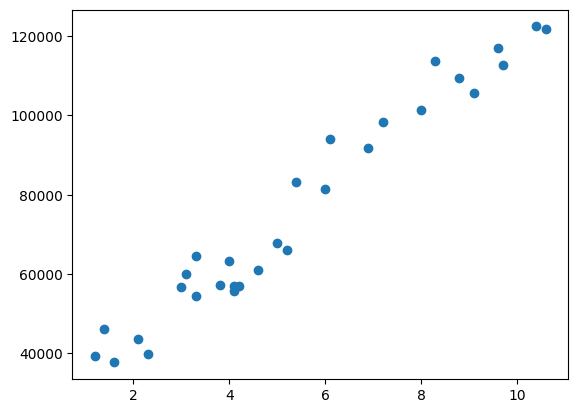

In [37]:
plt.scatter(X, Y)

In [38]:
inputs = torch.from_numpy(X_scaled.astype(np.float32))
targets = torch.from_numpy(Y_scaled.astype(np.float32))

In [39]:
model = nn.Linear(1, 1)

In [40]:
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)

In [47]:
losses = []

# Gradient Descent loop
n_epochs = 100
for it in range(n_epochs):
    # avoid aggregating gradients
    optimiser.zero_grad()

    # forward pass
    outputs = model(inputs)

    # calculate loss
    loss = criterion(outputs, targets)

    losses.append(loss.item())

    loss.backward()
    optimiser.step()

    print(f"Epoch: {it+1}/{n_epochs}, Loss: {losses[-1]:.4f}")

Epoch: 1/100, Loss: 0.0430
Epoch: 2/100, Loss: 0.0430
Epoch: 3/100, Loss: 0.0430
Epoch: 4/100, Loss: 0.0430
Epoch: 5/100, Loss: 0.0430
Epoch: 6/100, Loss: 0.0430
Epoch: 7/100, Loss: 0.0430
Epoch: 8/100, Loss: 0.0430
Epoch: 9/100, Loss: 0.0430
Epoch: 10/100, Loss: 0.0430
Epoch: 11/100, Loss: 0.0430
Epoch: 12/100, Loss: 0.0430
Epoch: 13/100, Loss: 0.0430
Epoch: 14/100, Loss: 0.0430
Epoch: 15/100, Loss: 0.0430
Epoch: 16/100, Loss: 0.0430
Epoch: 17/100, Loss: 0.0430
Epoch: 18/100, Loss: 0.0430
Epoch: 19/100, Loss: 0.0430
Epoch: 20/100, Loss: 0.0430
Epoch: 21/100, Loss: 0.0430
Epoch: 22/100, Loss: 0.0430
Epoch: 23/100, Loss: 0.0430
Epoch: 24/100, Loss: 0.0430
Epoch: 25/100, Loss: 0.0430
Epoch: 26/100, Loss: 0.0430
Epoch: 27/100, Loss: 0.0430
Epoch: 28/100, Loss: 0.0430
Epoch: 29/100, Loss: 0.0430
Epoch: 30/100, Loss: 0.0430
Epoch: 31/100, Loss: 0.0430
Epoch: 32/100, Loss: 0.0430
Epoch: 33/100, Loss: 0.0430
Epoch: 34/100, Loss: 0.0430
Epoch: 35/100, Loss: 0.0430
Epoch: 36/100, Loss: 0.0430
E

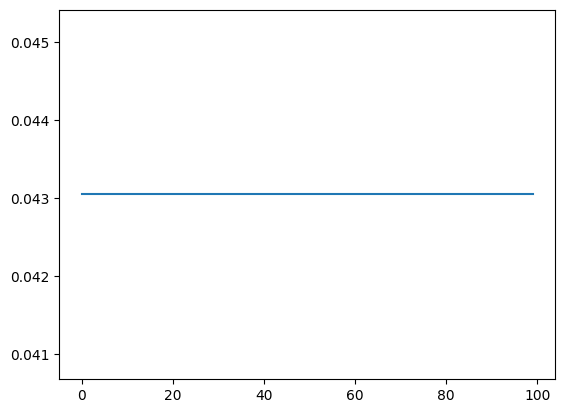

In [48]:
plt.plot(losses)

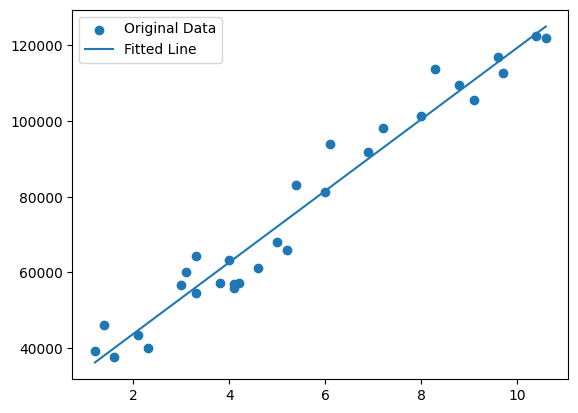

In [49]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label="Original Data")
predicted = scaler_Y.inverse_transform(predicted)
plt.plot(X, predicted, label="Fitted Line")
plt.legend()
plt.show()

In [50]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()

print(w, b)

[[0.9782415]] [1.4202488e-08]
